### Utility function check

In [1]:
from functions import *

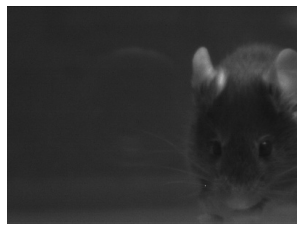

In [4]:
showImage(10, all_path)

In [11]:
# import test_for_convert as fcts

In [7]:
# from test_for_convert import *

In [8]:
import glob
import os
import re #regex library
from platform import python_version

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [9]:
all_path = []
for path in glob.glob("../data_all/mouse_pos/*.jpg"):
    all_path.append(path)
#     print(path)
len(all_path)

4555

In [10]:
data = pd.read_csv("../data_all/mouse_body_pos.csv")
data.head()

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
0,img_0001.jpg,265.0,85.0,382.0,95.0,280.0,198.0,342.0,199.0,296.0,276.0
1,img_0002.jpg,248.0,7.0,286.0,24.0,NaN,NaN,206.0,42.0,124.0,41.0
2,img_0003.jpg,265.0,85.0,381.0,96.0,276.0,197.0,338.0,199.0,291.0,276.0
3,img_0004.jpg,156.0,49.0,NaN,NaN,215.0,73.0,NaN,NaN,279.0,83.0
4,img_0005.jpg,170.0,99.0,230.0,99.0,192.0,143.0,234.0,147.0,227.0,183.0


In [11]:
# function 1

def pathSorting(all_path):
    fnum_str_list=[]
    # read the file and sort by numbers
    for path in all_path:    
        split_path=os.path.split(path)
        fname=split_path[1]
        fnum_included_str = re.findall(r'[0-9]+', fname)
        fnum_str = fnum_included_str[0]
        fnum_str_list.append(fnum_str)
        fnum_str_list.sort()
    sorted_path = [os.path.join(split_path[0], "img_"+fnum+".jpg") for fnum in fnum_str_list]
    return sorted_path

In [12]:
pathSorting(all_path)

['../data_all/mouse_pos/img_0001.jpg',
 '../data_all/mouse_pos/img_0002.jpg',
 '../data_all/mouse_pos/img_0003.jpg',
 '../data_all/mouse_pos/img_0004.jpg',
 '../data_all/mouse_pos/img_0005.jpg',
 '../data_all/mouse_pos/img_0006.jpg',
 '../data_all/mouse_pos/img_0007.jpg',
 '../data_all/mouse_pos/img_0008.jpg',
 '../data_all/mouse_pos/img_0009.jpg',
 '../data_all/mouse_pos/img_0010.jpg',
 '../data_all/mouse_pos/img_0011.jpg',
 '../data_all/mouse_pos/img_0012.jpg',
 '../data_all/mouse_pos/img_0013.jpg',
 '../data_all/mouse_pos/img_0014.jpg',
 '../data_all/mouse_pos/img_0015.jpg',
 '../data_all/mouse_pos/img_0016.jpg',
 '../data_all/mouse_pos/img_0017.jpg',
 '../data_all/mouse_pos/img_0018.jpg',
 '../data_all/mouse_pos/img_0019.jpg',
 '../data_all/mouse_pos/img_0020.jpg',
 '../data_all/mouse_pos/img_0021.jpg',
 '../data_all/mouse_pos/img_0022.jpg',
 '../data_all/mouse_pos/img_0023.jpg',
 '../data_all/mouse_pos/img_0024.jpg',
 '../data_all/mouse_pos/img_0025.jpg',
 '../data_all/mouse_pos/i

In [13]:
sorted_path = pathSorting(all_path)

In [14]:
len(sorted_path)

4555

In [15]:
all_path[1]

'../data_all/mouse_pos/img_2818.jpg'

In [16]:
def frame2Path(fr_num, all_path):
    fr_num=str(fr_num)    
    if len(fr_num)==1:
        fr_num = '000'+fr_num
    elif len(fr_num)==2:
        fr_num = '00'+fr_num
    elif len(fr_num)==3:
        fr_num = '0'+fr_num         
    split_path = os.path.split(all_path[0]) # an arbitrary path from all paths 
    path = os.path.join(split_path[0], "img_"+fr_num+".jpg")
    return fr_num, path

In [30]:
frame2Path(900, all_path)

('0900', '../data_all/mouse_pos/img_0900.jpg')

In [17]:
def showImage(fr_num, all_path):
    fr_num, path = frame2Path(fr_num, all_path)
    img=cv2.imread(path) 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = Image.open(path)
    plt.imshow(img) 
    plt.axis('off') 
    plt.show()

In [50]:
def showData(fr_num):
    single_df=data.iloc[[fr_num-1]]
    return single_df

In [18]:
fr_num = 900
fr_num, path = frame2Path(fr_num, all_path)
path

'../data_all/mouse_pos/img_0900.jpg'

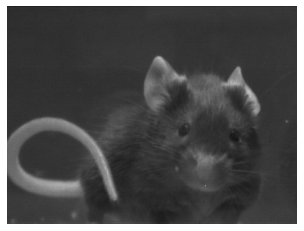

In [19]:
showImage(fr_num=900, all_path=all_path)

In [39]:
frame2Path(20,all_path)

('0020', '../data_all/mouse_pos/img_0020.jpg')

In [35]:
def showMarks(fr_num, data): 
    """
    This function returns two results:
    (1) image (ndarray) 
    (2) matrix of marked body parts (adarray of integer)
         [[ ear_rx, ear_ry ],
          [ ear_lx, ear_ly ],
          [ ear_cx, ear_cy ],
          [ eye_rx, eye_ry ],
          [ eye_lx, eye_ly ],
          [ eye_cx, eye_cy ],
          [   n_x ,   n_y  ]]
    If the data contains NaN value, it raises an error.
    """
    # Path 
    __, img_path=frame2Path(fr_num, all_path)
#     data_path = '../data_all/mouse_pos'
#     img_path = os.path.join(data_path,"img_0"+str(fr_num)+'.jpg')
    single_df=data.iloc[[fr_num-1]]
    if not single_df.isnull().values.any():
        # Retrieve the coordinates of the body parts to define variables
        ear_rx, ear_ry = int(single_df[['ear_r_x']].squeeze()), int(single_df[['ear_r_y']].squeeze())
        ear_lx, ear_ly = int(single_df[['ear_l_x']].squeeze()), int(single_df[['ear_l_y']].squeeze())
        eye_rx, eye_ry = int(single_df[['eye_r_x']].squeeze()), int(single_df[['eye_r_y']].squeeze())
        eye_lx, eye_ly = int(single_df[['eye_l_x']].squeeze()), int(single_df[['eye_l_y']].squeeze())
        n_x, n_y = int(single_df[['nose_x']].squeeze()), int(single_df[['nose_y']].squeeze())
        # calculate the centers
        ear_cx, ear_cy = int((ear_rx+ear_lx)/2), int((ear_ry+ear_ly)/2)
        eye_cx, eye_cy = int((eye_rx+eye_lx)/2), int((eye_ry+eye_ly)/2)
        
        all_list = np.empty((7,2))
        all_list[:] = np.nan
        all_list[0] = ear_rx, ear_ry
        all_list[1] = ear_lx, ear_ly
        all_list[2] = ear_cx, ear_cy
        all_list[3] = eye_rx, eye_ry
        all_list[4] = eye_lx, eye_ly
        all_list[5] = eye_cx, eye_cy
        all_list[6] = n_x, n_y
        
        radius = 1
        cyan=[0,255,255]
        yellow=[255,255,0]
        magenta=[255,0,255]
        font=cv2.FONT_HERSHEY_SIMPLEX
        font_scale=0.5

        img=cv2.imread(img_path) 
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_marked=img

        # plot the detected body parts
        img_marked=cv2.circle(img_marked, (ear_rx, ear_ry), radius=radius, color=cyan, thickness=5)
        img_marked=cv2.circle(img_marked, (ear_lx, ear_ly), radius=radius, color=cyan, thickness=5)
        img_marked=cv2.circle(img_marked, (eye_rx, eye_ry), radius=radius, color=yellow, thickness=5)
        img_marked=cv2.circle(img_marked, (eye_lx, eye_ly), radius=radius, color=yellow, thickness=5)
        img_marked=cv2.circle(img_marked, (n_x, n_y), radius=radius, color=magenta, thickness=5)

        # mark the center position
        img_marked=cv2.putText(img_marked, 'x', (ear_cx, ear_cy), font, font_scale, color=cyan, thickness=2)
        img_marked=cv2.putText(img_marked, 'x', (eye_cx, eye_cy), font, font_scale, color=yellow, thickness=2)
    #     return plt.imshow(img_marked), print('test')
        return img_marked, all_list.astype(int)
    else:
        return print('Check whether the data strip contains NaN values.')

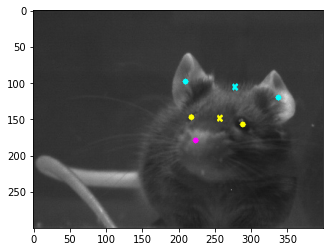

In [46]:
fr_num=940
img, mark = showMarks(fr_num=fr_num, data=data)
plt.imshow(img)

In [47]:
def panCheck(img, mark):
    """
    Run this function after executing 'showMarks(fr_num, data)'
    to acquire the argurments (img, mark).
    This function simply presents the status of pan angle-wise pose. 
    An error is raised when there is NaN value in the 'mark' argument.
    """ 
    if not np.isnan(np.sum(mark)):
        ear_rx, ear_ry = mark[0]
        ear_lx, ear_ly = mark[1]
        ear_cx, ear_cy = mark[2]
        eye_rx, eye_ry = mark[3]
        eye_lx, eye_ly = mark[4]
        eye_cx, eye_cy = mark[5]
        n_x, n_y = mark[6]
        # initial check
        if ear_rx < eye_rx & eye_rx < n_x:
            print('right side clear')
        if ear_lx > eye_lx & eye_lx > n_x:
            print('left side clear')
         # Hypothesis 1: critical part is the relation between the nose and eyes
        hori_eyes=abs(eye_lx-eye_rx) # distance between the eyes (horizontal)
        n_r_dev_raw=abs(eye_rx-n_x)
        n_l_dev_raw=abs(eye_lx-n_x)
        assert n_r_dev_raw+n_l_dev_raw == hori_eyes
        # how much the nose deviates: 
        n_r_dev=n_r_dev_raw/hori_eyes #if smaller than 0.5 -> turning to the right
        n_l_dev=n_l_dev_raw/hori_eyes # if smaller than 0.5 -> turning to the left
#         print(f'|R_eye---{n_r_dev}---N---{n_l_dev}---L_eye|')
        print('|R_eye---({:.2f})---N---({:.2f})---L_eye|'.format(n_r_dev, n_l_dev))
        
        plt.imshow(img)
        plt.axis('off')
        
        # define the front face when n_r_dev and n_l_dev is larger than 0.25 
        # to be a front face, those numbers should be between 0.5 w.r.t. the center
        if (n_r_dev >0.25) & (n_l_dev>0.25):
            print('front face in terms of x-coords') # (1)
        elif n_r_dev >0.25:
            print('turning to the left') # (2)
        else:
            print('turning to the right') #(3)
        
    else:
        return print('Check whether the datastrip contains NaN values.')
    

right side clear
left side clear
|R_eye---(0.08)---N---(0.92)---L_eye|
turning to the right


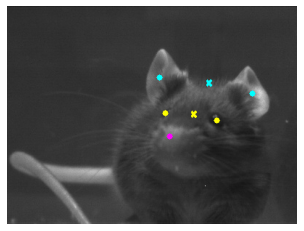

In [48]:
panCheck(img, mark)

In [67]:
def tiltCheck(img, mark):
    """
    Run this function after executing 'showMarks(fr_num, data)'
    to acquire the argurments (img, mark).
    This function simply presents the status of tilt angle-wise pose with marked image. 
    An error is raised when there is NaN value in the 'mark' argument.
    """ 
    if not np.isnan(np.sum(mark)):
        ear_rx, ear_ry = mark[0]
        ear_lx, ear_ly = mark[1]
        ear_cx, ear_cy = mark[2]
        eye_rx, eye_ry = mark[3]
        eye_lx, eye_ly = mark[4]
        eye_cx, eye_cy = mark[5]
        n_x, n_y = mark[6]
        
        # initial check   
        # Hypothesis 1: comparison between the distances (nose to eyes, eyes to ears) may imply important info.
        eye2ear_vert_raw=abs(eye_cy-ear_cy)
        eye2n_vert_raw=abs(eye_cy-n_y)
        ear2n_vert_raw=abs(ear_cy-n_y)
        assert eye2ear_vert_raw+eye2n_vert_raw == ear2n_vert_raw
        
        # which is larger and how much is the difference?
        eye2ear_vert_pro=round(eye2ear_vert_raw/ear2n_vert_raw,2) # round at 2nd decimal
        eye2n_vert_pro=round(eye2n_vert_raw/ear2n_vert_raw,2)
        result_m='''   
        --Ear center--
              |
            {:.2f}
              |
         -Eye center-
              |
            {:.2f}
              |
           --Nose--
        '''
        print(result_m.format(eye2ear_vert_pro, eye2n_vert_pro))
#         print('vertical distance from [Eye to Ear] : [Eye to Nose] = {:.2f} : {:.2f}'.format(eye2ear_vert_pro, eye2n_vert_pro))

        plt.imshow(img)
        plt.axis('off')
        
        # Hypothesis 2: Define the tilt-wise front face when the proportion is within 0.4 - 0.6
        if (eye2ear_vert_pro <= 0.6) &  (eye2ear_vert_pro >=0.4):
            print('front face in terms of y-coords') # (1)
        elif eye2ear_vert_pro > 0.6:
            print('tilting down')
        else:
            print('tiliting up')    
    
    else:
        return print('Check whether the datastrip contains NaN values.')  

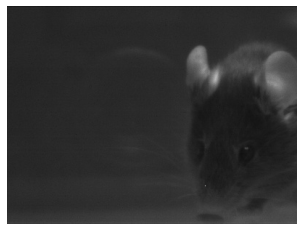

In [68]:
showImage(fr_num=8, all_path=all_path)

In [69]:
showData(fr_num=8)

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
7,img_0008.jpg,262.0,85.0,376.0,96.0,267.0,197.0,331.0,203.0,280.0,280.0


right side clear
left side clear
|R_eye---(0.22)---N---(0.78)---L_eye|
turning to the right
   
        --Ear center--
              |
            0.57
              |
         -Eye center-
              |
            0.43
              |
           --Nose--
        
front face in terms of y-coords


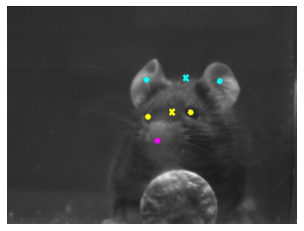

In [72]:
fr_num = 1173
img, mark = showMarks(fr_num, data)
panCheck(img, mark)
tiltCheck(img, mark)

In [51]:
def readImges(sorted_path):
    for path in sorted_path:
            img=cv2.imread(path) 
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#            img = Image.open(path)
            plt.imshow(img) 
            plt.axis('off') 
            plt.show()
        

In [134]:
os.path.split(all_path[0])[0]

'../data_all/mouse_pos'

In [113]:
def readFile(all_path):
    fnum_str_list=[]
#     fnum_int_list=[]
    # read the file and sort by numbers
    for path in all_path:    
        split_path=os.path.split(path)
        fname=split_path[1]
        fnum_included_str = re.findall(r'[0-9]+', fname)
        fnum_str = fnum_included_str[0]
#         fnum_int = int(fnum_str)
        fnum_str_list.append(fnum_str)
        fnum_str_list.sort()
        
    return  [os.path.join(split_path[0], "img_"+fnum+".jpg") for fum in fnum_str_list]
#         sorted_file_path = os.path.join(split_path[0], "img_"+fnum+".jpg")
        
#         fnum_int_list.append(fnum_int)
#         tandem = list(zip(fnum_str_list,fnum_int_list))
#         tandem.sort()
        
        #

    

In [114]:
readFile(all_path)

['../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/i